In [1]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
# import gdown
from skimage.measure import label, regionprops, regionprops_table
from scipy.stats import gaussian_kde
import torch
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import pickle

In [2]:
subimg = np.load('subimg.npy')

In [3]:
subimg.shape

(52984, 115, 115, 3)

Plotting the subimg array

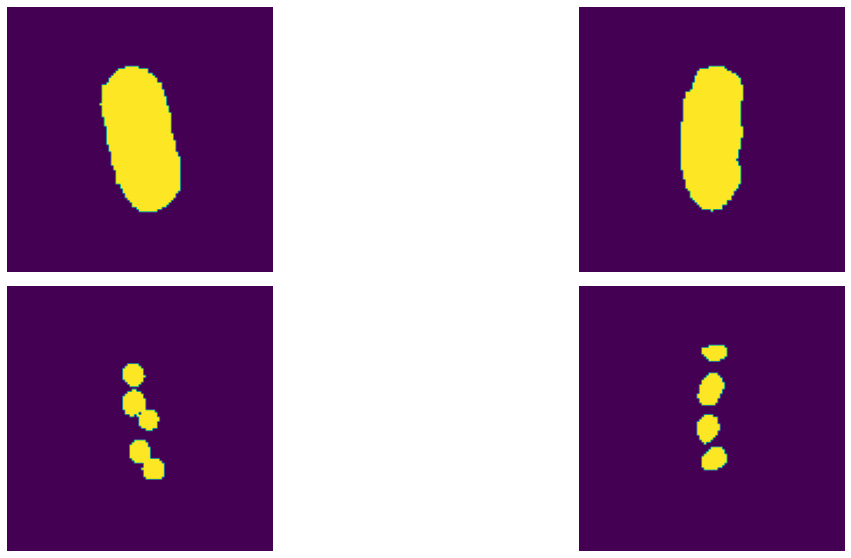

In [4]:
rows = 2
cols = 2

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(2):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(subimg[i+300,:,:,0])
    plt.axis('off')
#Set of carboxysomes masks
    ax = fig.add_subplot(gs[i+2])
    ax.imshow(subimg[i+300,:,:,1])
    plt.axis('off')
    

In [5]:
# pip install atomai

In [6]:
import atomai as aoi

In [7]:
window_size = 115
channels = 3
in_dim = (window_size, window_size,channels)
rvae= aoi.models.load_model("128model.tar")

# rvae = aoi.models.rVAE(in_dim, translation= True,
#                        numlayers_encoder=3, numhidden_encoder=128,
#                        numlayers_decoder=3, numhidden_decoder=128,
#                        Skip = True)

# rvae.fit(subimg, training_cycles =    200)

In [8]:
# rvae.save_model("128-400model")
# rvae.save_weights("w-128-400model")

In [9]:
# rvae= aoi.models.load_model("model.tar")

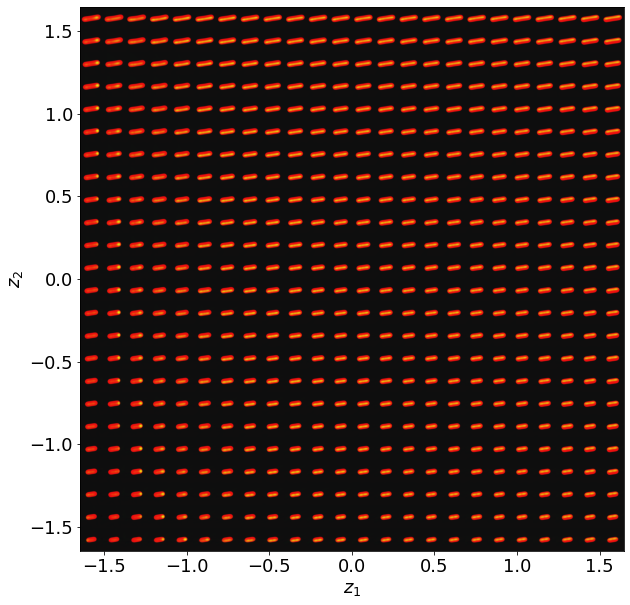

In [10]:
rvae.manifold2d(d=24);

In [11]:
subimg_cell_mask = pickle.load(open('subimg_cell_mask.pkl', "rb"))
subimg_CBs_mask = pickle.load(open('subimg_CBs_mask.pkl', "rb"))

In [12]:
len(subimg_cell_mask), len(subimg_CBs_mask)

(10, 10)

In [13]:
def get_arrays(cell_mask,CBs_mask,iplace):
    subimg1 = cell_mask[iplace]
    subimg2 = CBs_mask[iplace] 
    subimg_t= np.zeros_like(subimg1, dtype ='float32')
    subimg_t[:,:,:,0] = subimg1[:,:,:,0]
    subimg_t[:,:,:,1] = subimg2[:,:,:,0]
    print(subimg_t.shape)
    return subimg_t

In [14]:
ac = []
bc = []
ai = []
bi = []
for i in range(0,5):
    subimg_t = get_arrays(subimg_cell_mask,subimg_CBs_mask,i)
    a1, b1 = rvae.encode(subimg_t)
    ac.append(a1), bc.append(b1)
    
for i in range(5,10):
    subimg_t = get_arrays(subimg_cell_mask,subimg_CBs_mask,i)
    a2, b2 = rvae.encode(subimg_t)
    ai.append(a2), bi.append(b2)

(4388, 115, 115, 3)
(7492, 115, 115, 3)
(7665, 115, 115, 3)
(2977, 115, 115, 3)
(6594, 115, 115, 3)
(4159, 115, 115, 3)
(528, 115, 115, 3)
(10325, 115, 115, 3)
(4875, 115, 115, 3)
(3981, 115, 115, 3)


In [15]:
# np.save("subimg_i.npy",subimg_i)

In [16]:
a_t = ['4','8','24','48','72']

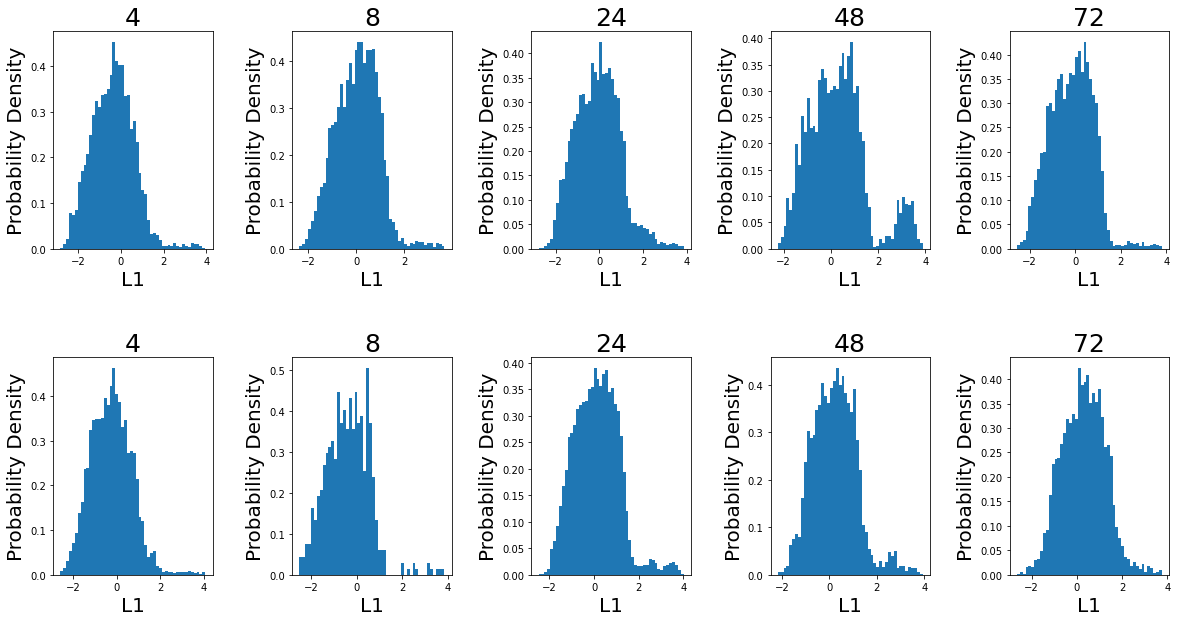

In [17]:
rows = 2
cols = 5
n=5

#L1 histograms
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(rows, cols, wspace = 0.5, hspace = 0.5)
for i in range(n):
#Control
    ax = fig.add_subplot(gs[i])
    ax.hist(ac[i][:,3], bins = 50, density = True, stacked = True);
    ax.set_title(a_t[i], fontsize=25) 
    ax.set_xlabel('L1',fontsize=20)
    ax.set_ylabel('Probability Density',fontsize=20)
    # ax.text(-3., 0.45, "control".format(i+1), weight = 'bold', fontsize = 10, color = 'black')
    # ax.set_xlim([-4, 4])
    # ax.set_ylim([0, 0.5])
#Induced
    ax = fig.add_subplot(gs[i+n])
    ax.hist(ai[i][:,3], bins = 50, density = True, stacked = True);
    ax.set_title(a_t[i], fontsize=25) 
    ax.set_xlabel('L1',fontsize=20)
    ax.set_ylabel('Probability Density',fontsize=20)
    # ax.text(-3., 0.45, "induced".format(i+1), weight = 'bold', fontsize = 10, color = 'black')
    # ax.set_xlim([-4, 4])
    # ax.set_ylim([0, 0.5])

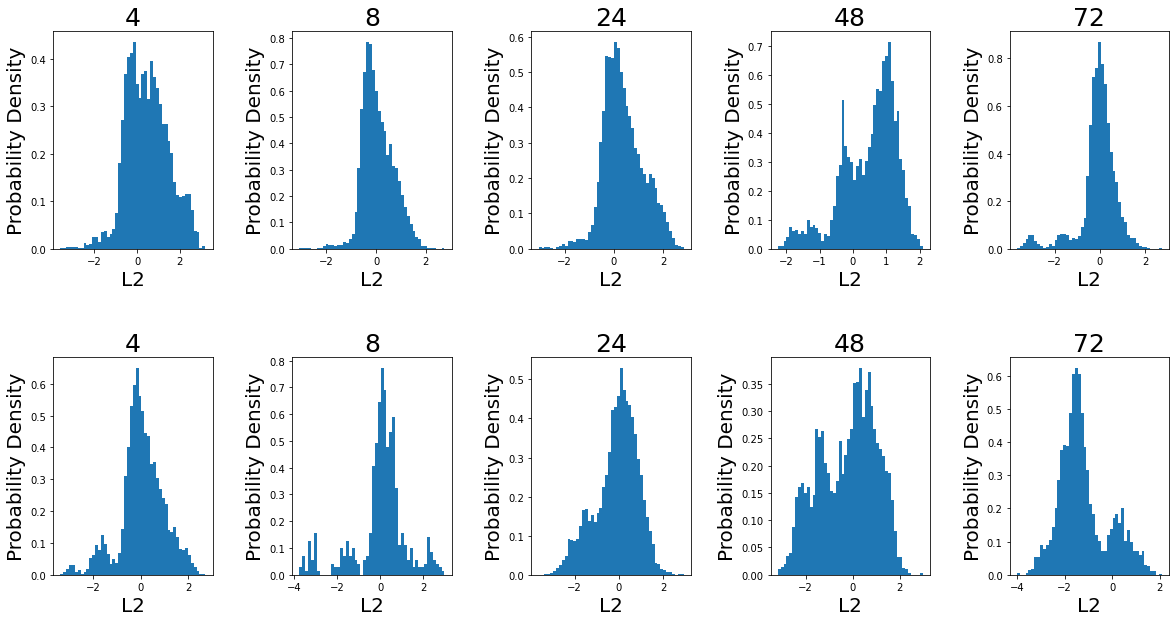

In [18]:
rows = 2
cols = 5
n=5

#L1 histograms
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(rows, cols, wspace = 0.5, hspace = 0.5)
for i in range(n):
#Control
    ax = fig.add_subplot(gs[i])
    ax.hist(ac[i][:,4], bins = 50, density = True, stacked = True);
    ax.set_title(a_t[i], fontsize=25) 
    ax.set_xlabel('L2',fontsize=20)
    ax.set_ylabel('Probability Density',fontsize=20)
    # ax.text(-3., 0.45, "control".format(i+1), weight = 'bold', fontsize = 10, color = 'black')
    # ax.set_xlim([-4, 4])
    # ax.set_ylim([0, 0.5])
#Induced
    ax = fig.add_subplot(gs[i+n])
    ax.hist(ai[i][:,4], bins = 50, density = True, stacked = True);
    ax.set_title(a_t[i], fontsize=25) 
    ax.set_xlabel('L2',fontsize=20)
    ax.set_ylabel('Probability Density',fontsize=20)
    # ax.text(-3., 0.45, "induced".format(i+1), weight = 'bold', fontsize = 10, color = 'black')
    # ax.set_xlim([-4, 4])
    # ax.set_ylim([0, 0.5])

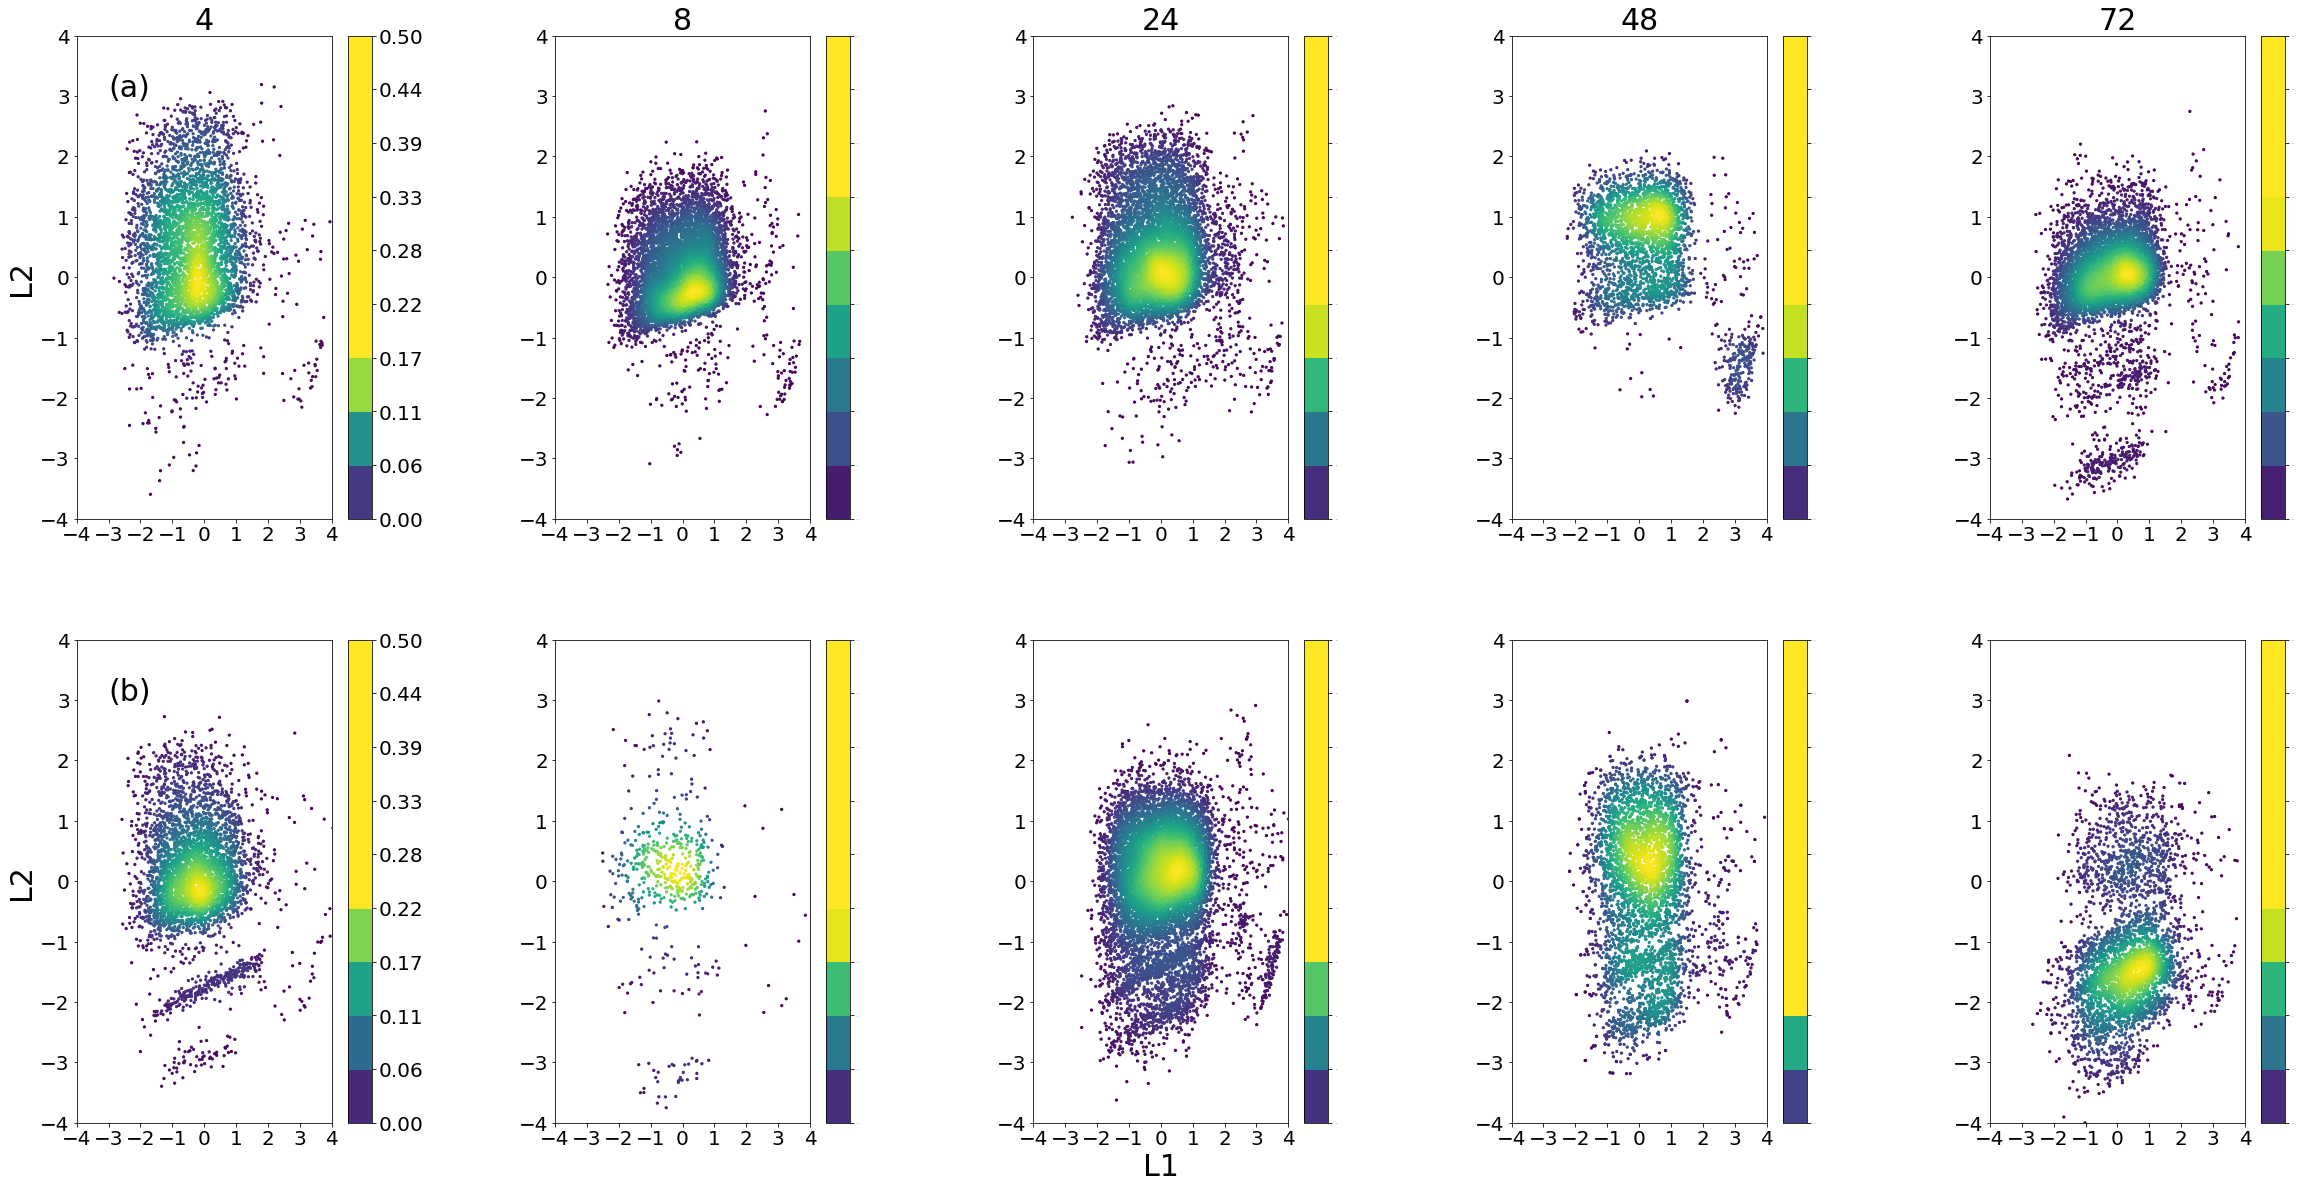

In [31]:
#L1-L2 joint distributions
fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.5, hspace = 0.25)
for i in range(5):
#Control
    ax = fig.add_subplot(gs[i])
    x = ac[i][:,3]
    y = ac[i][:,4]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # z = gaussian_kde(xy)(xy)
    sc=ax.scatter(x, y, c=z, s=5)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    cbar = fig.colorbar(sc,boundaries=np.linspace(0,.5,10),format='%.2f')
    ax.set_title(a_t[i], fontsize=30) 
    if i == 0 :
        ax.set_ylabel('L2',fontsize=30)
        # ax.text(-3., 3, "(a)".format(i+1), weight = 'bold', fontsize = 30, color = 'black')
        ax.text(-3., 3, "(a)".format(i+1), fontsize = 30, color = 'black')


    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    if i == 0 :
        cbar.ax.tick_params(labelsize=20) 
    else:
        cbar.ax.tick_params(labelsize=0)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#Induced
    ax = fig.add_subplot(gs[i+5])
    x = ai[i][:,3]
    y = ai[i][:,4]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    sc=ax.scatter(x, y, c=z, s=5)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    cbar = fig.colorbar(sc,boundaries=np.linspace(0,.5,10),format='%.2f')
    # ax.set_title(a_t[i], fontsize=25)
    if i + 5 == 5 : 
        ax.set_ylabel('L2',fontsize=30) 
        cbar.ax.tick_params(labelsize=20) 
        # ax.text(-3., 3, "(b)".format(i+1), weight = 'bold', fontsize = 30, color = 'black')
        ax.text(-3., 3, "(b)".format(i+1), fontsize = 30, color = 'black')


    elif i + 5 == 7:
        ax.set_xlabel('L1',fontsize=30)
        cbar.ax.tick_params(labelsize=0)  
    else:
        cbar.ax.tick_params(labelsize=0)  
         
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig('Fig10',dpi=300,bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

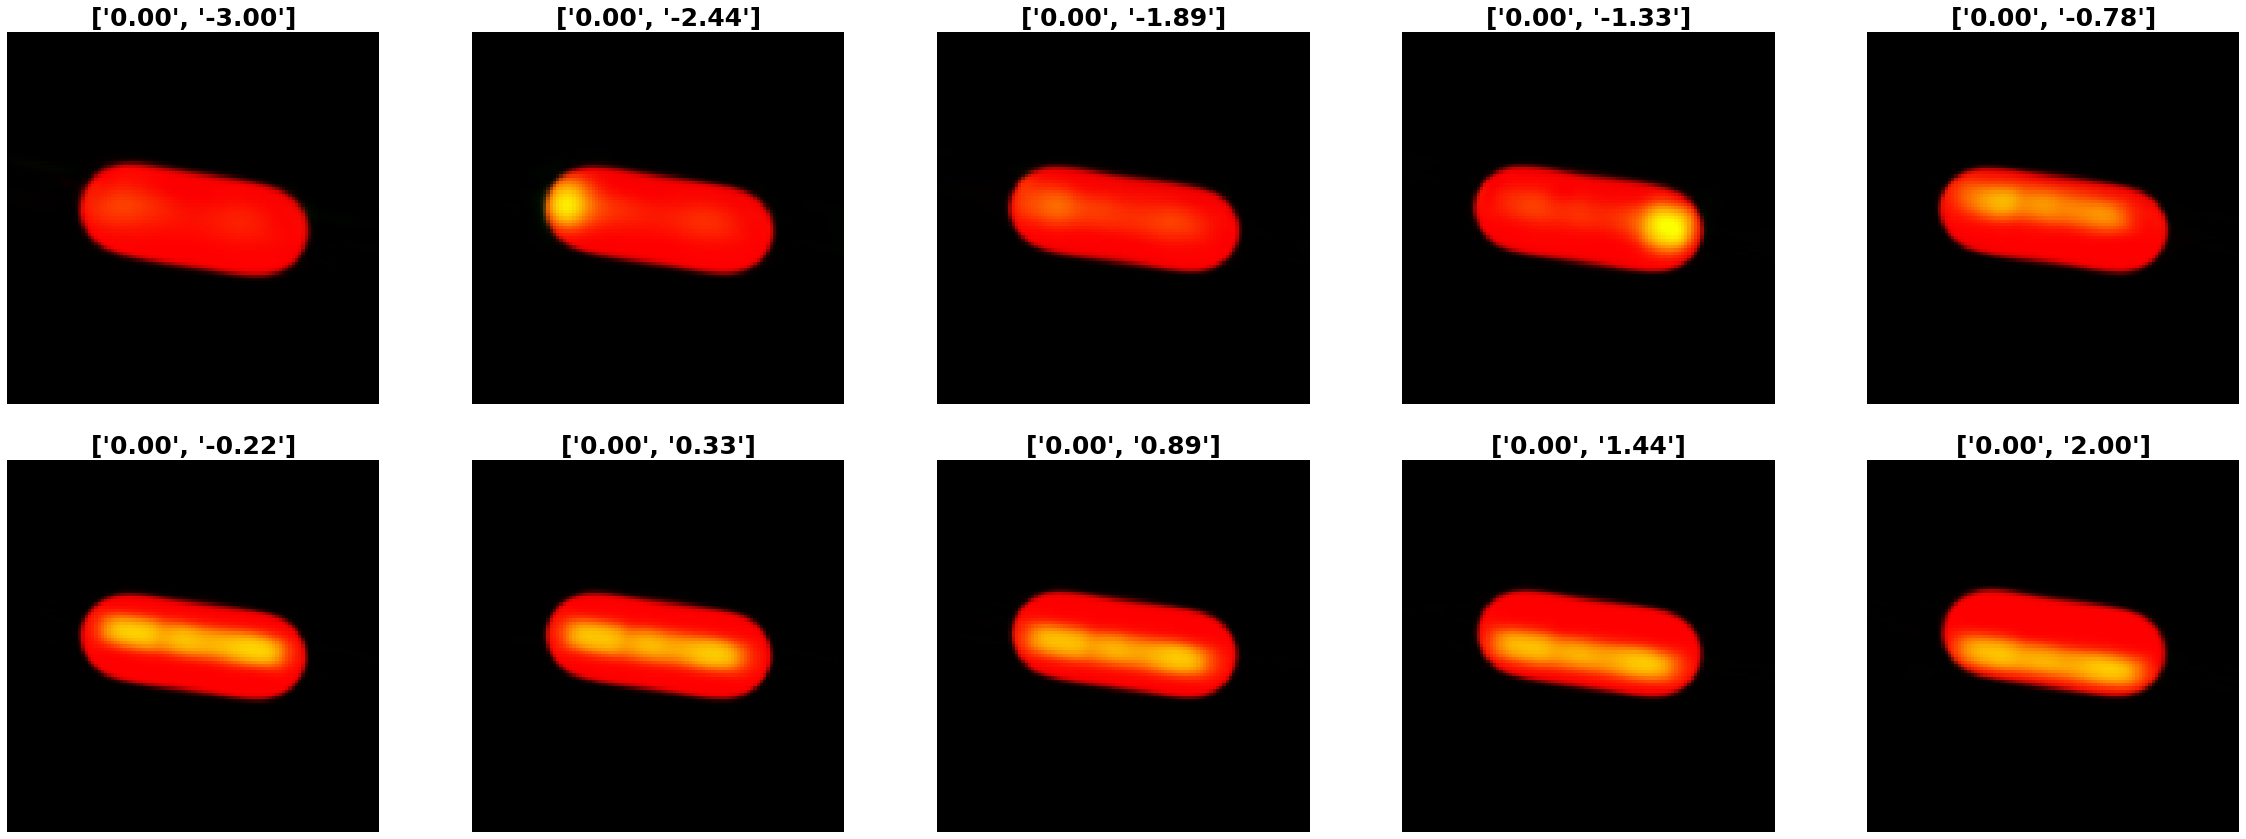

In [81]:
lv2_vals = np.linspace(-3,2,10)
lv1_vals = np.zeros_like(lv2_vals)
lv1_vals = 0.0 + lv1_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)

ls = []
for i in range(len(lv1_vals)):
    # print(lv1_vals[i],lv2_vals[i])
    ls.append([lv1_vals[i],lv2_vals[i]])
    # ls.append(lv2_vals[i])

fls=[]    
for uno, dos in ls:
    one= ("%.2f" %uno)  
    two= ("%.2f" %dos)
    fls.append([one,two])
    
rows = 2
cols = 5
n=5

#L1 histograms
fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.25, hspace = -0.35)
for i in range(n):
#Control
    ax = fig.add_subplot(gs[i])
    ax.imshow(decoded1[i], cmap="gnuplot")
    ax.set_title(fls[i], fontsize=25, weight='bold')
    # ax.annotate('(a)',xy=(0,7),fontsize=40,color='white',fontweight=20)
    plt.axis('off')
    ax = fig.add_subplot(gs[i+5])
    ax.set_title(fls[i+n], fontsize=25,  weight='bold')
    ax.imshow(decoded1[i+n], cmap="gnuplot")
    plt.axis('off')
plt.savefig('Fig11',dpi=300,bbox_inches='tight')  